In [1]:
import matplotlib.pyplot as plt
from utils import *
from keras.optimizers import Adam

image_size = (768, 768) #(512,512) (720, 1280)
bs = 2

better_model = False
load_pretrained_weights = False

losses = sparse_crossentropy_ignoring_last_label
metrics = {'pred_mask' : [Jaccard, sparse_accuracy_ignoring_last_label]}

backbone = 'mobilenetv2' #mobilenetv2, xception

NET = 'deeplab_' + backbone
PATH = '/mnt/deep_learning/samples/'

n_classes = 2

Using TensorFlow backend.


In [2]:
SegClass = SegModel(PATH, image_size)
SegClass.set_batch_size(bs)


model = SegClass.create_seg_model(net='original',n=n_classes, load_weights=load_pretrained_weights,
                                      multi_gpu=False, backbone=backbone)

model.compile(optimizer = Adam(lr=7e-4, epsilon=1e-8, decay=1e-6), sample_weight_mode = "temporal",
              loss = losses, metrics = metrics)
print('Weights path:', SegClass.modelpath)














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use `tf.cast` instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.cast` instead.
Weights path: weights/mobilenetv2_original.h5


In [4]:
model.load_weights(SegClass.modelpath)

In [5]:
SegClass.modelpath

'weights/mobilenetv2_original.h5'

In [6]:
test_img1 = cv2.imread('/mnt/deep_learning/test_v2/7028c4629.jpg', 1)
test_img_1  = test_img1.reshape(1,768,768,3)

In [7]:
preds1 = np.argmax(model.predict(test_img_1), -1)[0].reshape(image_size)

Text(0.5, 1.0, 'predicted Mask')

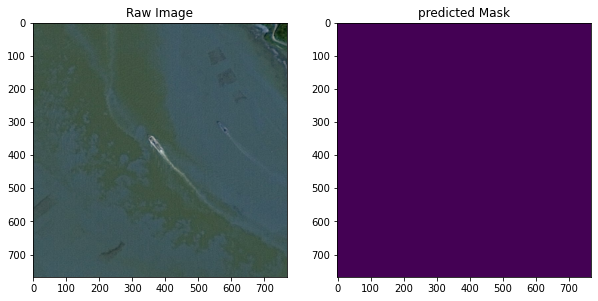

In [17]:
%matplotlib inline 
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.imshow(test_img_1[0])
ax1.set_title('Raw Image')
ax2.imshow(preds1)
ax2.set_title('predicted Mask')

In [15]:
np.unique(preds1)

array([0])